# Multivariate Statistics Exc. 8: Correpondence Analysis

In [24]:
import pandas as pd
import prince as pc
import seaborn as sns

In [5]:
data = pd.read_csv("../Data/juice.csv").drop('Unnamed: 0', axis=1)

In [6]:
data.head()

,Brand,Criterion,Education
0,Relax,Packaging,Elementary
1,Relax,Packaging,Elementary
2,Relax,Packaging,Elementary
3,Relax,Packaging,Elementary
4,Relax,Packaging,Elementary


In [12]:
pd.crosstab(data['Brand'], data['Criterion'], margins=True, normalize=True)

Criterion,Packaging,Price,Quality,Taste,Tradition,All
Brand,,,,,,
Cappy,0.041818,0.025455,0.049091,0.023636,0.050909,0.190909
Hello,0.021818,0.040000,0.025455,0.034545,0.018182,0.140000
Rauch,0.027273,0.030909,0.043636,0.010909,0.061818,0.174545
Relax,0.056364,0.052727,0.043636,0.030909,0.063636,0.247273
Toma,0.027273,0.040000,0.069091,0.018182,0.092727,0.247273
All,0.174545,0.189091,0.230909,0.118182,0.287273,1.000000


In [13]:
pd.crosstab(data['Brand'], data['Criterion'], margins=True, normalize=False)

Criterion,Packaging,Price,Quality,Taste,Tradition,All
Brand,,,,,,
Cappy,23,14,27,13,28,105
Hello,12,22,14,19,10,77
Rauch,15,17,24,6,34,96
Relax,31,29,24,17,35,136
Toma,15,22,38,10,51,136
All,96,104,127,65,158,550


In [21]:
crosstab_abs = pd.crosstab(data['Brand'], data['Criterion'], margins=True, normalize=False)
crosstab_rel = pd.crosstab(data['Brand'], data['Criterion'], margins=True, normalize=True)

In [23]:
crosstab_abs.apply(lambda y: y/crosstab_abs['All'])

Criterion,Packaging,Price,Quality,Taste,Tradition,All
Brand,,,,,,
Cappy,0.219048,0.133333,0.257143,0.123810,0.266667,1.0
Hello,0.155844,0.285714,0.181818,0.246753,0.129870,1.0
Rauch,0.156250,0.177083,0.250000,0.062500,0.354167,1.0
Relax,0.227941,0.213235,0.176471,0.125000,0.257353,1.0
Toma,0.110294,0.161765,0.279412,0.073529,0.375000,1.0
All,0.174545,0.189091,0.230909,0.118182,0.287273,1.0


## 2 Correspondence Analysis

In [26]:
c_an = pc.CA(n_components=2,
             n_iter=3,
             copy=True,
             check_input=True,
             engine='auto',
             random_state=42).fit(crosstab_abs)

In [28]:
c_an.row_coordinates(crosstab_abs)

,0,1
Cappy,-6.101395e-03,-8.810318e-02
Hello,3.624829e-01,1.112074e-01
Rauch,-1.461230e-01,6.650174e-03
Relax,8.589758e-02,-8.353692e-02
Toma,-1.832706e-01,8.390048e-02
All,-1.398768e-16,4.389865e-16


In [29]:
c_an.column_coordinates(crosstab_abs)

,0,1
Packaging,7.920576e-02,-1.732336e-01
Price,1.462799e-01,6.230901e-02
Quality,-1.084882e-01,3.547669e-02
Taste,3.366798e-01,5.672118e-02
Tradition,-1.957154e-01,1.239162e-02
All,-8.396942e-17,1.540727e-16


<AxesSubplot:title={'center':'Principal coordinates'}, xlabel='Component 0 (77.23% inertia)', ylabel='Component 1 (16.01% inertia)'>

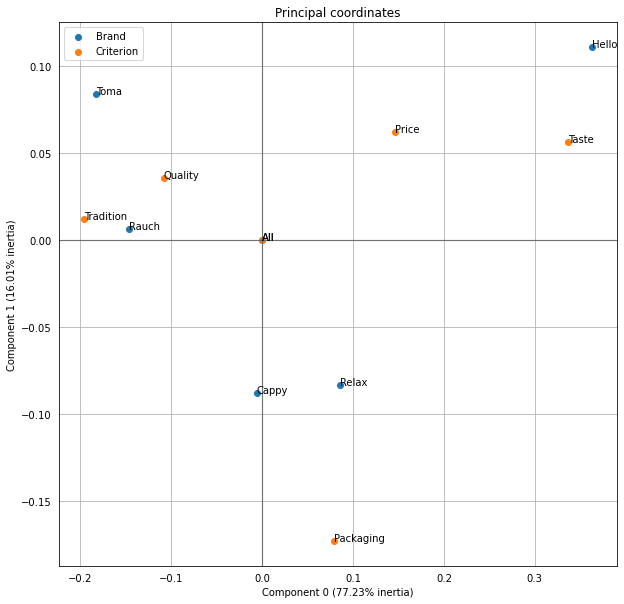

In [33]:
c_an.plot_coordinates(crosstab_abs, figsize=(10, 10))

In [31]:
c_an.explained_inertia_

[0.7722819423064471, 0.16009123801617217]

In [32]:
c_an.total_inertia_

0.020885521842669036

In [ ]:
c_an.